In [ ]:
pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [3]:
yf.pdr_override()

In [87]:
ticker= 'META'
data =  pd.DataFrame()
data[ticker]=wb.DataReader(ticker,start ='2017-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [88]:
log_return = np.log(1+data.pct_change())  ## log_retutn in percentage change
log_return

,META
Date,
2017-01-03,NaN
2017-01-04,0.015538
2017-01-05,0.016544
2017-01-06,0.022453
2017-01-09,0.012001
...,...
2022-12-23,0.007824
2022-12-27,-0.009876
2022-12-28,-0.010839


Plotting the META's price over time

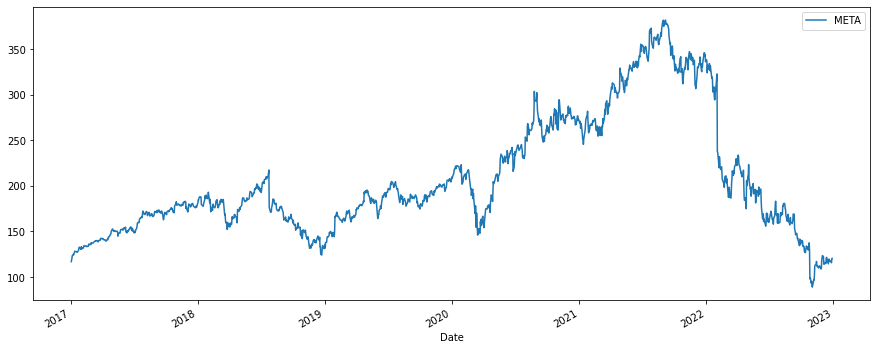

In [89]:
data.plot(figsize=(15,6))

Plotting the Log Return of META overtime

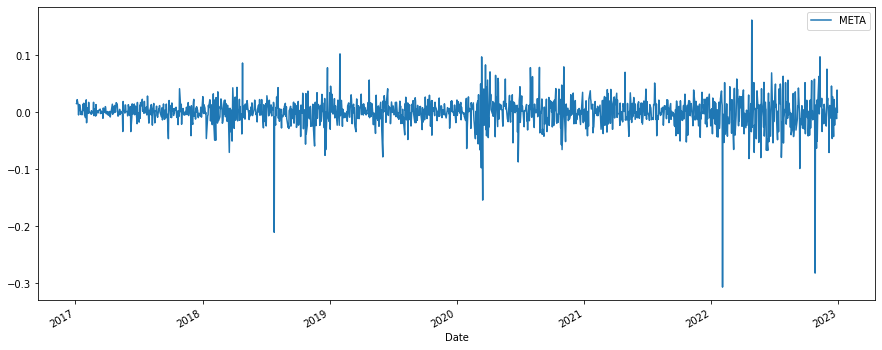

In [90]:
log_return.plot(figsize = (15,6))

In [91]:
u= log_return.mean()
u

META    0.000019
dtype: float64

In [92]:
var = log_return.var()
var

META    0.000671
dtype: float64

We will estimate META's daily stock price. so we will use Brownian Motion formula r =drift +stdev *e^r

Drift = u - {(1/2)*var}


In [93]:
drift = u-(0.5*var)
drift

META   -0.000316
dtype: float64

In [94]:
stdev = log_return.std()
stdev

META    0.025896
dtype: float64

object.values --> Transfer the object into numpy array

In [95]:
drift.values

array([-0.00031586])

In [96]:
stdev.values

array([0.02589625])

z--> corresponds to the distance between the mean and the events, expressed as the number of standard deviations. scipy norm.ppf allow us obtain that result.

In [97]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-0.33436435,  0.97415694],
       [ 0.3496708 , -0.7030135 ],
       [-1.19480533, -2.1312264 ],
       [-0.70562266, -0.62964585],
       [ 0.64134258, -1.31746362],
       [ 0.70960746,  2.99001035],
       [ 1.43652282, -0.42902028],
       [-1.79172412,  1.6079722 ],
       [-0.83535017, -0.09026053],
       [-2.42114452, -0.31896989]])

In [98]:
t_interval = 1000
iteration =10

daily return =e^r

>


r = drift +stdev*z

In [99]:
daily_return = np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_interval,iteration)))
daily_return

array([[1.01752613, 0.99344107, 0.99357647, ..., 0.95377271, 1.00762951,
        0.98581565],
       [1.00714955, 1.00889771, 1.01301337, ..., 1.04772675, 0.97897275,
        1.03004337],
       [1.03830792, 0.99433925, 0.98863391, ..., 0.99567249, 0.99531484,
        0.97840277],
       ...,
       [1.00508834, 1.00634975, 0.99154838, ..., 1.01191129, 0.97564602,
        0.97784918],
       [0.99629681, 1.01027966, 0.98887518, ..., 0.98928257, 0.98935286,
        1.01015712],
       [0.99558302, 0.98023923, 0.98335557, ..., 1.03272929, 1.02246015,
        0.98099824]])

In [100]:
## the result is 10 sets of 1000 thousend random future stock prices

# St= S0* daily return

In [101]:
S0= data.iloc[-1]  ## This is the first stock price in our list
S0

META    120.339996
Name: 2022-12-30 00:00:00, dtype: float64

Let's proceed to fill in the list. How big should it be? As big as daily return Array is. Numpy "zeros_like" method help us obtain the same size arrays and fill zeros in it. we would fill values later

In [102]:
price_list = np.zeros_like(daily_return)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Now we can replace the zeros with stock price using loops. before that, we must set the fist row of our price list to 'S0'

In [103]:
price_list[0]=S0
price_list

array([[120.33999634, 120.33999634, 120.33999634, ..., 120.33999634,
        120.33999634, 120.33999634],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [104]:
 for t in range(1, t_interval):
   price_list[t] = price_list[t-1]*daily_return[t]

In [105]:
price_list

array([[120.33999634, 120.33999634, 120.33999634, ..., 120.33999634,
        120.33999634, 120.33999634],
       [121.20037283, 121.41074644, 121.90602529, ..., 126.08343299,
        117.80957729, 123.95541508],
       [125.84330699, 120.72347087, 120.52043016, ..., 125.53780558,
        117.25762082, 121.27832201],
       ...,
       [197.48453285, 106.06839169,  42.93802275, ..., 113.23823465,
         16.26202642,  61.29976305],
       [196.75320963, 107.1587391 ,  42.46034483, ..., 112.02461223,
         16.0888823 ,  61.92239206],
       [195.88415517, 105.04120002,  41.75361671, ..., 115.69109783,
         16.45024095,  60.74575778]])

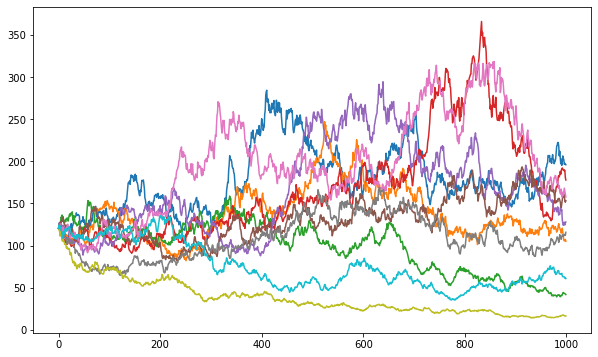

In [106]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

In [107]:
## This is 10 possible price direction of META